<a href="https://colab.research.google.com/github/kostique23/Image-Super-Resolution-using-Deep-Convolutional-Autoencoders/blob/main/image-super-resolution-autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### –í–í–û–î–ù–ê–Ø –ß–ê–°–¢–¨

 * **–¢–µ–º–∞ —Ä–∞–±–æ—Ç—ã:** –ü–æ–≤—ã—à–µ–Ω–∏–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å –ø–æ–º–æ—â—å—é –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–≤ —Å –≥–ª—É–±–æ–∫–∏–º–∏ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–º–∏ —Å–µ—Ç—è–º–∏

 * **–ê–≤—Ç–æ—Ä:** –ö—É–ª–µ–±—è–∫–∏–Ω –ö–æ–Ω—Å—Ç–∞–Ω—Ç–∏–Ω

 * **–ê–Ω–Ω–æ—Ç–∞—Ü–∏—è:** –í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ —Ä–µ–∞–ª–∏–∑—É—é—Ç—Å—è –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–≤ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –û—Å–Ω–æ–≤–Ω–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ —É–¥–µ–ª—è–µ—Ç—Å—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–µ U-Net, –∫–æ—Ç–æ—Ä–∞—è –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –≤—ã—Å–æ–∫—É—é —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤ –∑–∞–¥–∞—á–∞—Ö –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è. –î–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö DIV2K. –í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è PSNR (Peak Signal-to-Noise Ratio) –∏ SSIM (Structural Similarity Index).

### –£–°–¢–ê–ù–û–í–ö–ê –ò –ò–ú–ü–û–†–¢ –ë–ò–ë–õ–ò–û–¢–ï–ö

In [ ]:
#@title –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

!pip install -q tensorflow

In [ ]:
#@title –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

import numpy as np                                                                         # –†–∞–±–æ—Ç–∞ —Å –º–∞—Å—Å–∏–≤–∞–º–∏
import matplotlib.pyplot as plt                                                            # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
import tensorflow as tf                                                                    # –§—Ä–µ–π–º–≤–æ—Ä–∫ –¥–ª—è –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
from tensorflow.keras import layers, models                                                # –°–ª–æ–∏ –∏ –º–æ–¥–µ–ª–∏ Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                        # –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint                      # Callbacks –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
from tensorflow.keras.utils import plot_model                                              # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏
from tqdm import tqdm                                                                      # Progress bar
import os                                                                                  # –†–∞–±–æ—Ç–∞ —Å —Ñ–∞–π–ª–æ–≤–æ–π —Å–∏—Å—Ç–µ–º–æ–π
import cv2                                                                                 # –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è OpenCV (–¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π)
from sklearn.model_selection import train_test_split                                       # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ train/test
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr # –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
import random                                                                              # –î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª

### –¢–ï–û–†–ï–¢–ò–ß–ï–°–ö–ê–Ø –ß–ê–°–¢–¨

* **–ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã:**

 –ó–∞–¥–∞—á–∞ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∏–∑–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤—ã—Å–æ–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ –∏—Å–∫–∞–∂–µ–Ω–∏—è–º–∏.  
 –≠—Ç–∞ –∑–∞–¥–∞—á–∞ –∞–∫—Ç—É–∞–ª—å–Ω–∞ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–±–ª–∞—Å—Ç—è—Ö, —Ç–∞–∫–∏—Ö –∫–∞–∫:
  * –ú–µ–¥–∏—Ü–∏–Ω–∞: —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏—Ö —Å–Ω–∏–º–∫–æ–≤
  * –°–ø—É—Ç–Ω–∏–∫–æ–≤–∞—è —Å—ä–µ–º–∫–∞: –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–µ–º–Ω–æ–π –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏
  * –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤–∏–¥–µ–æ: —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –≤–∏–¥–µ–æ
  * –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è: —É–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –∏ –≤–∏–¥–µ–æ–∏–≥—Ä.

* **–û—Å–Ω–æ–≤–Ω—ã–µ –∫–æ–Ω—Ü–µ–ø—Ü–∏–∏:**

1. –ê–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä—ã:

 –ê–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä—ã - —ç—Ç–æ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–±—É—á–∞—é—Ç—Å—è –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –≤—ã—Ö–æ–¥–µ. –û–Ω–∏ —Å–æ—Å—Ç–æ—è—Ç –∏–∑ –¥–≤—É—Ö –æ—Å–Ω–æ–≤–Ω—ã—Ö —á–∞—Å—Ç–µ–π:
 * –ö–æ–¥–∏—Ä–æ–≤—â–∏–∫ - —Å–∂–∏–º–∞–µ—Ç –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ –∫–æ–º–ø–∞–∫—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ (–ª–∞—Ç–µ–Ω—Ç–Ω–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ)
 * –î–µ–∫–æ–¥–µ—Ä - –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è.

 –í –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è, –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ –ø–∞—Ä–∞—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –Ω–∏–∑–∫–æ–≥–æ –∏ –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è, —Å—Ç—Ä–µ–º—è—Å—å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∏–∑–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è.  

2. –ì–ª—É–±–æ–∫–∏–µ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–µ —Å–µ—Ç–∏ (SNN):

 SNN –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω—ã—Ö –±–ª–æ–∫–æ–≤ –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –∏ –¥–µ–∫–æ–¥–µ—Ä–∞, –±–ª–∞–≥–æ–¥–∞—Ä—è –∏—Ö —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –∏–∑–≤–ª–µ–∫–∞—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

3. –ú–µ—Ç—Ä–∏–∫–∏ PSNR –∏ SSIM:

 –ú–µ—Ç—Ä–∏–∫–∏ PSNR –∏ SSIM —è–≤–ª—è—é—Ç—Å—è –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞–º–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∑–∞–¥–∞—á–∞—Ö —Å—É–ø–µ—Ä—Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è.

 * PSNR (–ü–∏–∫–æ–≤–æ–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–∏–≥–Ω–∞–ª–∞ –∫ —à—É–º—É):

 PSNR –∏–∑–º–µ—Ä—è–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É –æ—Ä–∏–≥–∏–Ω–∞–ª–æ–º –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º. –û–Ω–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ.

 –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
   1. –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ PSNR, —Ç–µ–º –º–µ–Ω—å—à–µ –æ—à–∏–±–æ–∫ –∏ –ª—É—á—à–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
   2. –û–±—ã—á–Ω–æ –¥–ª—è —Ö–æ—Ä–æ—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è PSNR —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ 30 –¥–ë.

 * SSIM (–ò–Ω–¥–µ–∫—Å —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–æ–≥–æ —Å—Ö–æ–¥—Å—Ç–≤–∞):

 SSIM –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å—Ä–∞–≤–Ω–∏–≤–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω—ã–µ —ç–ª–µ–º–µ–Ω—Ç—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ —è—Ä–∫–æ—Å—Ç—å, –∫–æ–Ω—Ç—Ä–∞—Å—Ç–Ω–æ—Å—Ç—å –∏ —Ç–µ–∫—Å—Ç—É—Ä–∞, –º–µ–∂–¥—É –æ—Ä–∏–≥–∏–Ω–∞–ª–æ–º –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º. –≠—Ç–∞ –º–µ—Ç—Ä–∏–∫–∞ –±–æ–ª–µ–µ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–º –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ–º –∫–∞—á–µ—Å—Ç–≤–∞.

 –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
   1. –ó–Ω–∞—á–µ–Ω–∏—è SSIM –≤–∞—Ä—å–∏—Ä—É—é—Ç—Å—è –æ—Ç 0 –¥–æ 1, –≥–¥–µ 1 –æ–∑–Ω–∞—á–∞–µ—Ç –∏–¥–µ–Ω—Ç–∏—á–Ω–æ—Å—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
   2. SSIM —Å—á–∏—Ç–∞–µ—Ç—Å—è –±–æ–ª–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º –∫ –≤–æ—Å–ø—Ä–∏—è—Ç–∏—é —á–µ–ª–æ–≤–µ–∫–∞, —á–µ–º PSNR.

 –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫:
 * PSNR –ø–æ–ª–µ–∑–µ–Ω –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ —Ä–∞–∑–Ω–∏—Ü—ã, –Ω–æ –Ω–µ –≤—Å–µ–≥–¥–∞ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ.
 * SSIM –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ—Å–ø—Ä–∏—è—Ç–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∏ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–æ–≥–æ —Å—Ö–æ–¥—Å—Ç–≤–∞.

 –í —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –æ–±–µ–∏—Ö –º–µ—Ç—Ä–∏–∫ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –∫–æ–º–ø–ª–µ–∫—Å–Ω—É—é –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

* **–ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:**

 –û–±—É—á–µ–Ω–∏–µ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –∫–æ—Ç–æ—Ä–∞—è –∏–∑–º–µ—Ä—è–µ—Ç —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏ –∏—Å—Ö–æ–¥–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è. –í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞ (MSE) –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å:

  MSE = (1/n) * Œ£(y·µ¢ - ≈∑·µ¢)¬≤, –≥–¥–µ:
    * n - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∏–∫—Å–µ–ª–µ–π –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏,
    * y·µ¢ - –∑–Ω–∞—á–µ–Ω–∏–µ i-–≥–æ –ø–∏–∫—Å–µ–ª—è –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è,
    * ≈∑·µ¢ - –∑–Ω–∞—á–µ–Ω–∏–µ i-–≥–æ –ø–∏–∫—Å–µ–ª—è –≤ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è.

  –í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è, –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç —Å–≤–æ–∏ –≤–µ—Å–∞, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å MSE, —Ç–µ–º —Å–∞–º—ã–º —É–ª—É—á—à–∞—è –∫–∞—á–µ—Å—Ç–≤–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

* **–ò—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã:**

 –í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ –º–Ω–æ–π –±—ã–ª–æ –≤—ã–±—Ä–∞–Ω–æ 4 –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞: –ø—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä, —É—Å–ª–æ–∂–Ω—ë–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä, –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –∏ U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä.
  
 –≠—Ç–∏ –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ –≤—ã–±—Ä–∞–Ω—ã, —á—Ç–æ–±—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ —É—Ä–æ–≤–Ω–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –∑–∞–¥–∞—á–∏ –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

  * –ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –±—ã–ª –≤—ã–±—Ä–∞–Ω –¥–ª—è –Ω–∞—á–∞–ª–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –º–∏–Ω–∏–º–∞–ª–∏—Å—Ç–∏—á–Ω—É—é –º–æ–¥–µ–ª—å —Å –±–∞–∑–æ–≤–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –±—ã—Å—Ç—Ä–µ–µ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –∏ –º–µ—Ç–æ–¥—ã –±–µ–∑ —Å–ª–æ–∂–Ω—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö –∑–∞—Ç—Ä–∞—Ç.

  * –£—Å–ª–æ–∂–Ω—ë–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –≤–∫–ª—é—á–∞–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —ç–ª–µ–º–µ–Ω—Ç—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏ –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å—Ç—Ä–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –µ–≥–æ –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–º –∏ —Å–ø–æ—Å–æ–±–Ω—ã–º –∫ –∏–∑–≤–ª–µ—á–µ–Ω–∏—é –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –≠—Ç–æ –≤–∞–∂–Ω–æ –¥–ª—è –∏–∑—É—á–µ–Ω–∏—è –≤–ª–∏—è–Ω–∏—è —ç—Ç–∏—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

  * –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –±—ã–ª –≤–∫–ª—é—á—ë–Ω –¥–ª—è –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞, —Ç–∞–∫ –∫–∞–∫ –æ–Ω —Å–ø–æ—Å–æ–±–µ–Ω –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—Ç—å –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —á—Ç–æ –∫—Ä–∏—Ç–∏—á–Ω–æ –¥–ª—è –∑–∞–¥–∞—á, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å —É–ª—É—á—à–µ–Ω–∏–µ–º –∫–∞—á–µ—Å—Ç–≤–∞.

  * U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –±—ã–ª –≤—ã–±—Ä–∞–Ω –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å–∞–º–æ–π —Å–ª–æ–∂–Ω–æ–π –∏ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç–æ–π –º–æ–¥–µ–ª–∏ –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≤–æ–µ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–µ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å–æ—Ö—Ä–∞–Ω—è—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –≠—Ç–æ –∏–¥–µ–∞–ª—å–Ω—ã–π –≤—ã–±–æ—Ä –¥–ª—è –∑–∞–¥–∞—á–∏ —Å—É–ø–µ—Ä—Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è, –≥–¥–µ –≤–∞–∂–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –º–µ–ª–∫–∏—Ö –¥–µ—Ç–∞–ª–µ–π.  


1. **–ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä**

 –û–ø–∏—Å–∞–Ω–∏–µ:
 * –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ –¥–≤–∞ —Å–ª–æ—è —Å–≤—ë—Ä—Ç–∫–∏.
 * –ö–æ–¥–∏—Ä–æ–≤—â–∏–∫ —É–º–µ–Ω—å—à–∞–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–æ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è, –∞ –¥–µ–∫–æ–¥–µ—Ä –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –µ–≥–æ –æ–±—Ä–∞—Ç–Ω–æ.
 * –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –º–æ–¥–µ–ª—å –±—ã—Å—Ç—Ä–æ–π –≤ –æ–±—É—á–µ–Ω–∏–∏, –Ω–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π –≤ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—è—Ö.

 –î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:
 * –ü—Ä–æ—Å—Ç–∞—è –∏ –±—ã—Å—Ç—Ä–∞—è –≤ –æ–±—É—á–µ–Ω–∏–∏.
 * –ú–µ–Ω—å—à–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

 –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏:
 * –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–ª–æ–∂–Ω–∞—è –¥–ª—è –∑–∞—Ö–≤–∞—Ç–∞ –≥–ª—É–±–æ–∫–∏—Ö –∏ —Å–ª–æ–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.
 * –ö–∞—á–µ—Å—Ç–≤–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∏–∑–∫–æ–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏.

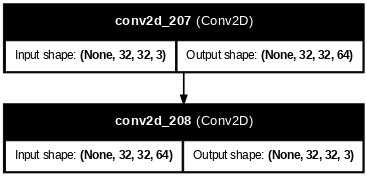

–†–∏—Å. 1. –°—Ö–µ–º–∞ –ø—Ä–æ—Å—Ç–æ–≥–æ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞

2. **–£—Å–ª–æ–∂–Ω—ë–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä**

 –û–ø–∏—Å–∞–Ω–∏–µ:
 * –î–æ–±–∞–≤–ª–µ–Ω —Å–ª–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ (BatchNormalization), —á—Ç–æ —É–ª—É—á—à–∞–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –∏ —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã.
 * –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å—Ç—Ä–æ–≤, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—Ç—å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

 –î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:
 * –£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö.
 * –õ—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞–¥–∞—á–∞–º–∏, –≥–¥–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

 –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏:
 * –í—Å—ë –µ—â—ë –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –≥–ª—É–±–∏–Ω—ã –∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å–ª–æ–∂–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤—ã—Å–æ–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞.

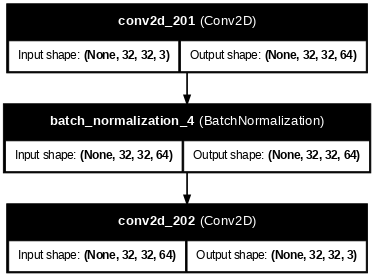

–†–∏—Å. 2. –°—Ö–µ–º–∞ —É—Å–ª–æ–∂–Ω—ë–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞

3. **–ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä**

 –û–ø–∏—Å–∞–Ω–∏–µ:
 * –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –≤–∫–ª—é—á–∞–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –±–ª–æ–∫–æ–≤ —Å–≤—ë—Ä—Ç–∫–∏ –∏ –ø—É–ª–∏–Ω–≥–∞ –≤ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–µ, –∞ —Ç–∞–∫–∂–µ –∏—Ö –∑–µ—Ä–∫–∞–ª—å–Ω—ã–µ –±–ª–æ–∫–∏ –≤ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–µ.
 * –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –≥–ª—É–±–∏–Ω—ã –º–æ–¥–µ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–º–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

 –î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:
 * –£–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏.
 * –ì–ª—É–±–æ–∫–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–¥–µ–ª—è—Ç—å –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö.

 –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏:
 * –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å.
 * –¢—Ä–µ–±—É–µ—Ç—Å—è –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.

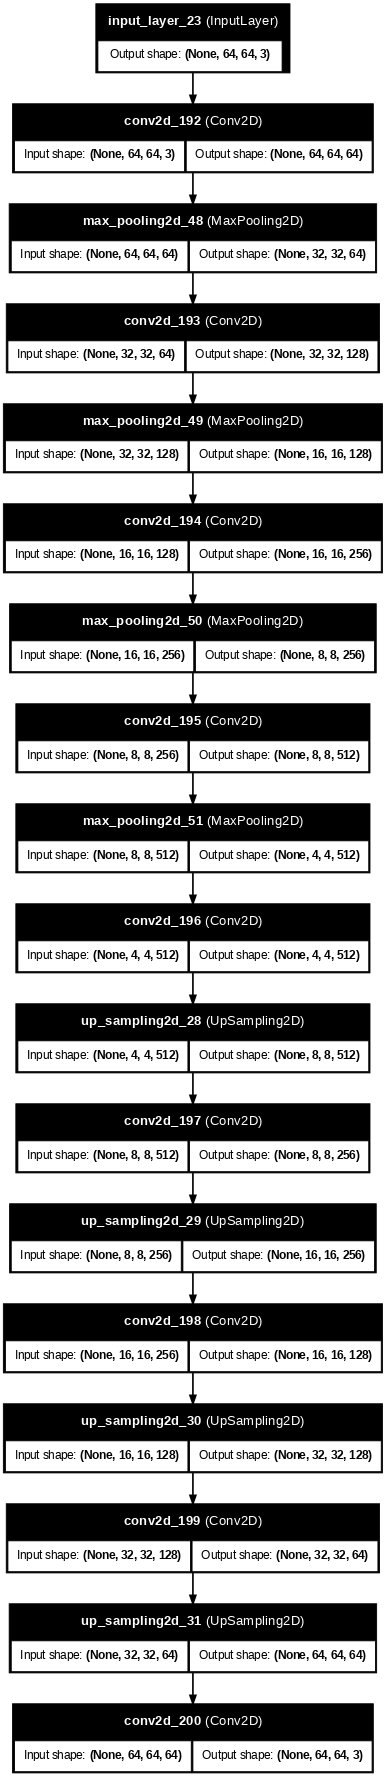

–†–∏—Å. 3. –°—Ö–µ–º–∞ –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞

4. **U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä**

 –û–ø–∏—Å–∞–Ω–∏–µ:
 * –û—Å–Ω–æ–≤–∞–Ω –Ω–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–µ U-Net, –∫–æ—Ç–æ—Ä–∞—è –≤–∫–ª—é—á–∞–µ—Ç —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã–µ –∫–æ–¥–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–æ—á–Ω—ã–µ –±–ª–æ–∫–∏.
 * –ò—Å–ø–æ–ª—å–∑—É–µ—Ç –º–µ—Ö–∞–Ω–∏–∑–º –ø—Ä–æ–ø—É—Å–∫–∞, —Å–æ–µ–¥–∏–Ω—è—é—â–∏–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —É—Ä–æ–≤–Ω–∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

 –î–æ—Å—Ç–æ–∏–Ω—Å—Ç–≤–∞:
 * –ü—Ä–æ–ø—É—Å–∫–∏ –ø–æ–∑–≤–æ–ª—è—é—Ç –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å –≤—ã—Å–æ–∫–æ—á–∞—Å—Ç–æ—Ç–Ω—ã–µ –¥–µ—Ç–∞–ª–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
 * –£—Å—Ç–æ–π—á–∏–≤ –∫ –ø—Ä–æ–±–ª–µ–º–µ –∏—Å—á–µ–∑–∞—é—â–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –∑–∞ —Å—á—ë—Ç –ø—Ä—è–º–æ–≥–æ —Å–æ–µ–¥–∏–Ω–µ–Ω–∏—è –º–µ–∂–¥—É —É—Ä–æ–≤–Ω—è–º–∏.
 * –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –∏ —Ç–µ–∫—Å—Ç—É—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
 * –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∞—è –º–æ–¥–µ–ª—å –¥–ª—è –∑–∞–¥–∞—á–∏ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

 –ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏:
 * –í—ã—Å–æ–∫–∞—è –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å.
 * –¢—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ.

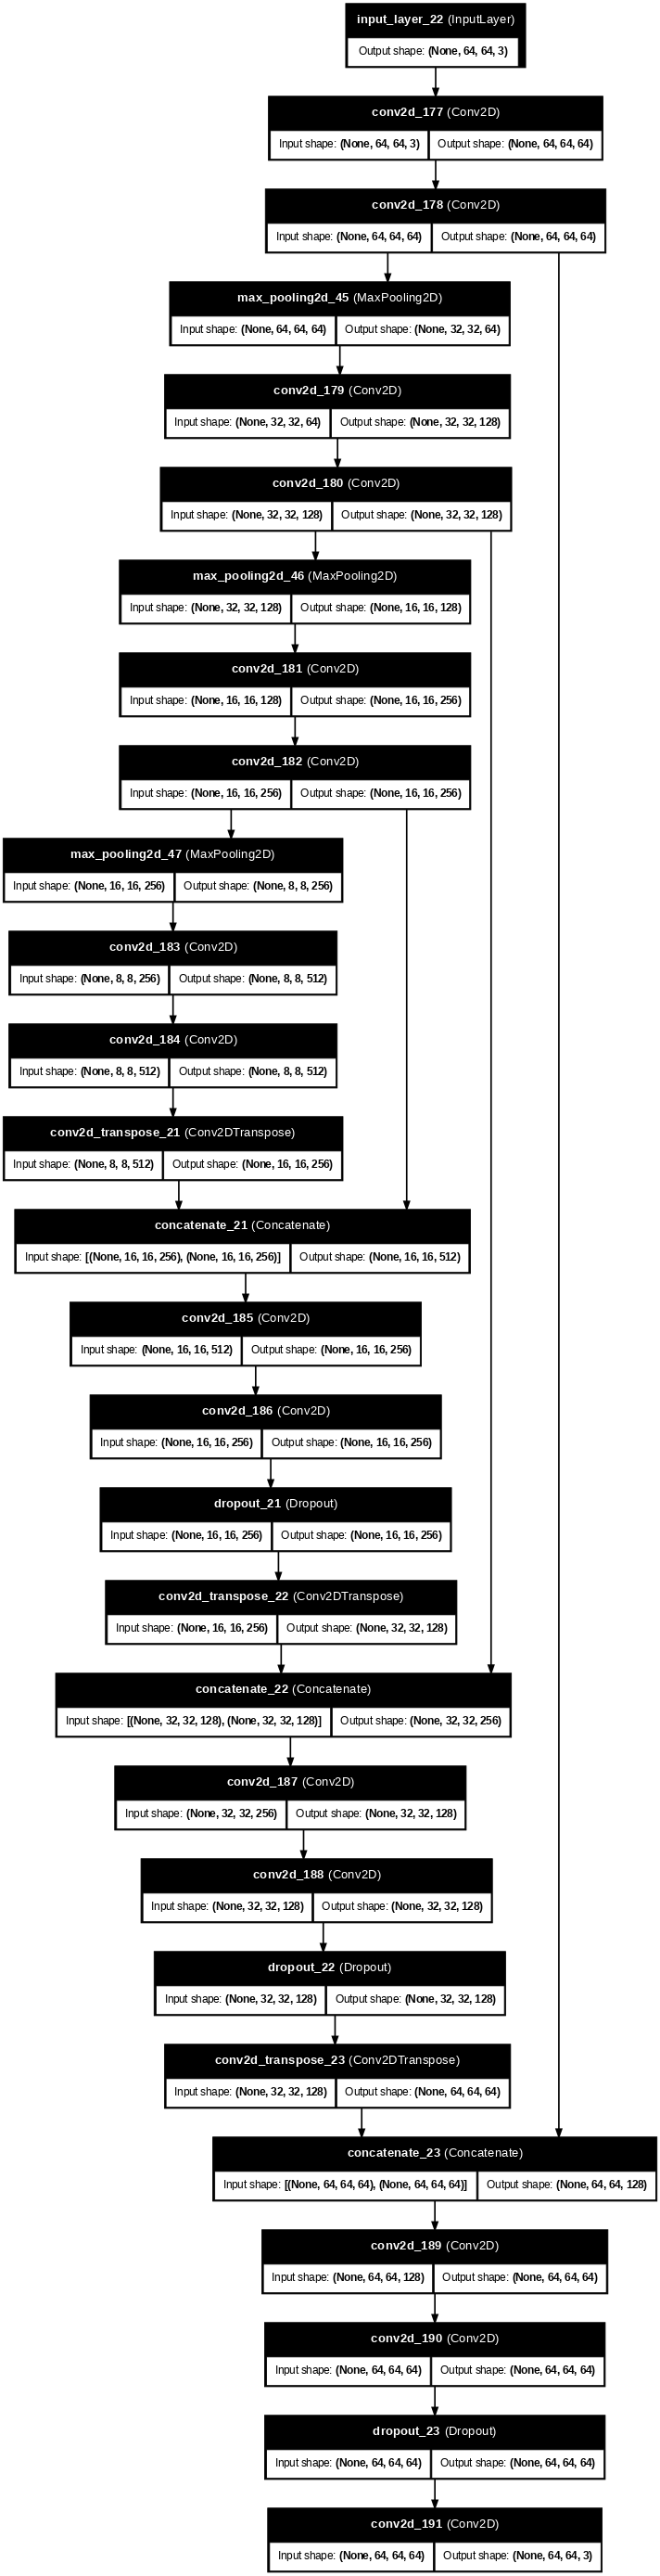

–†–∏—Å. 4. –°—Ö–µ–º–∞ U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞

**–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –∑–∞–¥–∞—á–∏:**

| –ú–æ–¥–µ–ª—å | –ü—Ä–æ—Å—Ç–æ—Ç–∞ | –ö–∞—á–µ—Å—Ç–≤–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è | –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å–ª–æ–∂–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è |
|-------------------------|--------------|-------------|--------------|----------|
| –ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä     | ‚úÖ ‚úÖ ‚úÖ üü© | ‚úÖ üü© üü© üü© |      ‚ùå      | ‚úÖ ‚úÖ ‚úÖ üü© |
| –£—Å–ª–æ–∂–Ω—ë–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä | ‚úÖ ‚úÖ üü© üü© | ‚úÖ ‚úÖ üü© üü© | ‚úÖ üü© üü© üü© | ‚úÖ ‚úÖ üü© üü© |
| –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä | ‚úÖ üü© üü© üü© | ‚úÖ ‚úÖ ‚úÖ üü© | ‚úÖ ‚úÖ üü© üü© | ‚úÖ üü© üü© üü© |
| U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä       | ‚úÖ üü© üü© üü© | ‚úÖ ‚úÖ ‚úÖ ‚úÖ | ‚úÖ ‚úÖ ‚úÖ üü© | ‚úÖ üü© üü© üü© |

–ì–¥–µ  ‚úÖ ‚úÖ ‚úÖ ‚úÖ - –æ—á–µ–Ω—å –∫—Ä—É—Ç–æüëç, –∞  ‚úÖ üü© üü© üü© - –æ—á–µ–Ω—å –ø–ª–æ—Ö–æüëé

U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä —è–≤–ª—è–µ—Ç—Å—è –ª—É—á—à–∏–º –≤—ã–±–æ—Ä–æ–º –¥–ª—è –∑–∞–¥–∞—á–∏ –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ï–≥–æ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å —Å–ª–æ–∂–Ω—ã–µ —Ç–µ–∫—Å—Ç—É—Ä—ã –¥–µ–ª–∞–µ—Ç –µ–≥–æ –æ—Å–æ–±–µ–Ω–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º. –û–¥–Ω–∞–∫–æ, –µ—Å–ª–∏ —Ä–µ—Å—É—Ä—Å—ã –æ–≥—Ä–∞–Ω–∏—á–µ–Ω—ã, –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω–æ–≥–æ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞ –∫–∞–∫ –±–æ–ª–µ–µ –ª—ë–≥–∫–æ–π –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã —Å —á—É—Ç—å –º–µ–Ω—å—à–∏–º –∫–∞—á–µ—Å—Ç–≤–æ–º.

### –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–•

In [ ]:
#@title –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

!wget https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

# –†–∞—Å–ø–∞–∫–æ–≤–∫–∞ –∞—Ä—Ö–∏–≤–∞
!unzip -qo "DIV2K_train_HR.zip" -d ./DIV2K_train_HR

--2025-01-23 05:16:08--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‚ÄòDIV2K_train_HR.zip‚Äô

DIV2K_train_HR.zip  100%[===================>]   3.29G  19.7MB/s    in 3m 10s  

2025-01-23 05:19:19 (17.7 MB/s) - ‚ÄòDIV2K_train_HR.zip‚Äô saved [3530603713/3530603713]



In [ ]:
#@title –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
def load_images(path, size=(128, 128, 3)):
    images = []
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ RGB
                img = cv2.resize(img, (size[0], size[1]))  # –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞
                images.append(img)
    return np.array(images)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
def augment_images(images):

    # –°–æ–∑–¥–∞–µ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ (ImageDataGenerator)
    datagen = ImageDataGenerator(
        rotation_range=20,            # –ü–æ–≤–æ—Ä–æ—Ç –Ω–∞ —Å–ª—É—á–∞–π–Ω—ã–π —É–≥–æ–ª
        width_shift_range=0.2,        # –°–¥–≤–∏–≥ –ø–æ —à–∏—Ä–∏–Ω–µ
        height_shift_range=0.2,       # –°–¥–≤–∏–≥ –ø–æ –≤—ã—Å–æ—Ç–µ
        shear_range=0.2,              # –°–¥–≤–∏–≥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        zoom_range=0.2,               # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
        brightness_range=[0.8, 1.2],  # –ò–∑–º–µ–Ω–µ–Ω–∏–µ —è—Ä–∫–æ—Å—Ç–∏
        channel_shift_range=20,       # –°–ª—É—á–∞–π–Ω–æ–µ —Å–º–µ—â–µ–Ω–∏–µ —Ü–≤–µ—Ç–æ–≤—ã—Ö –∫–∞–Ω–∞–ª–æ–≤
        horizontal_flip=True,         # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ
        vertical_flip = True,         # –í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ
        fill_mode='nearest'           # –†–µ–∂–∏–º –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    )

    augmented_images = []
    for img in images:
        img = img.reshape((1,) + img.shape)  # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–∞–∫–µ—Ç–∞
        # –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º 10 –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ
        it = datagen.flow(img, batch_size=1)
        augmented_images.extend([next(it)[0] for _ in range(10)])

    return np.array(augmented_images)

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è
hr_images = load_images('/content/DIV2K_train_HR/DIV2K_train_HR')
hr_quantity = len(hr_images) # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
hr_images_augmented = augment_images(hr_images)

# –°–æ–∑–¥–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –Ω–∏–∑–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑ –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è
lr_images_augmented = [cv2.resize(img, (32, 32)) for img in hr_images_augmented]

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
hr_images_processed = np.array(hr_images_augmented) / 255.0
lr_images_processed = np.array(lr_images_augmented) / 255.0

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (–¥–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏): {hr_quantity}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (–ø–æ—Å–ª–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏): {len(hr_images_processed)}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –Ω–∏–∑–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏: {len(lr_images_processed)}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (–¥–æ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏): 800
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (–ø–æ—Å–ª–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏): 8000
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –Ω–∏–∑–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏: 8000


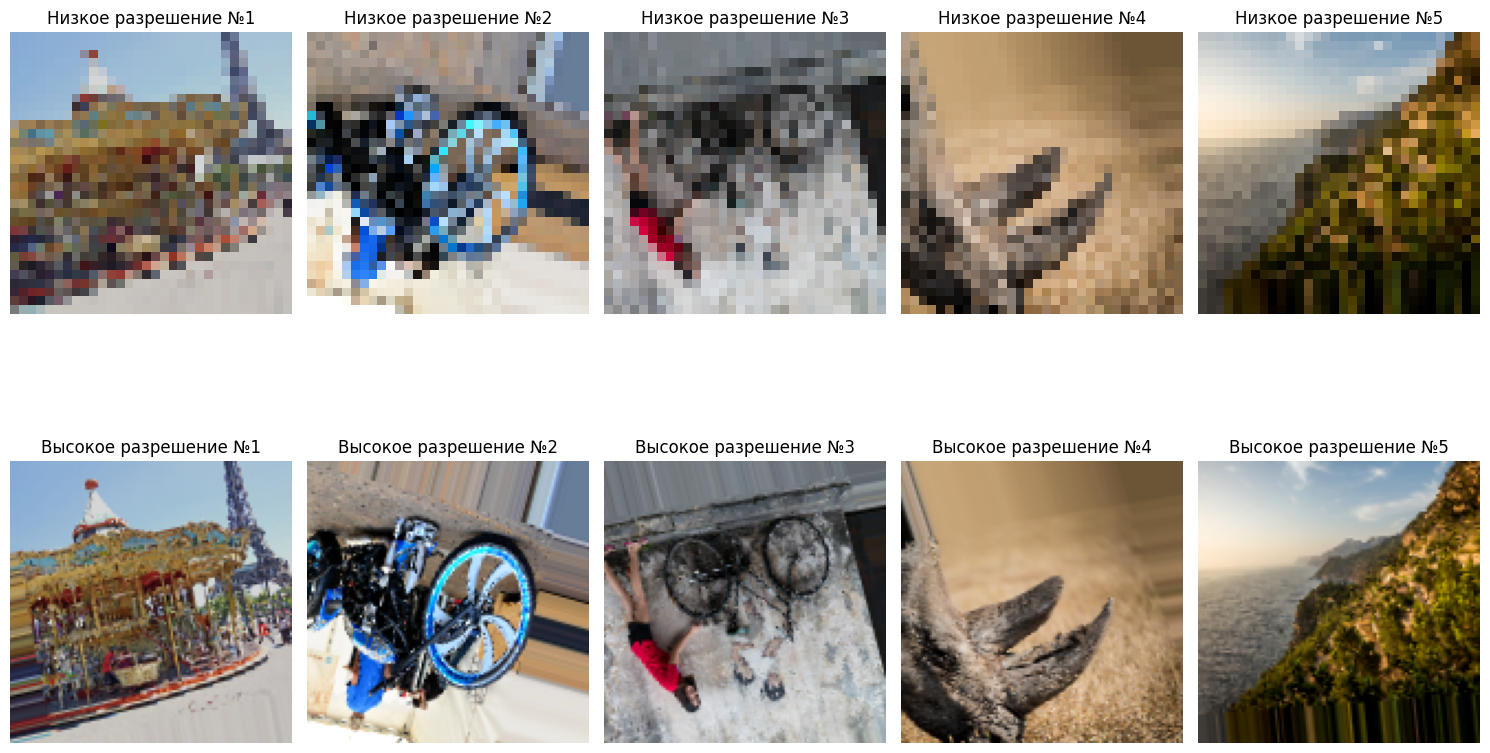

In [ ]:
#@title –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤ –¥–ª—è 5 –ø–∞—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
random_indices = random.sample(range(len(lr_images_processed)), 5)

plt.figure(figsize=(15, 10))

# –í –≤–µ—Ä—Ö–Ω–µ–º —Ä—è–¥—É –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –Ω–∏–∑–∫–∏–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ–º
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.title(f'–ù–∏–∑–∫–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ ‚Ññ{i + 1}')
    plt.imshow(lr_images_processed[idx])
    plt.axis('off')

# –í –Ω–∏–∂–Ω–µ–º —Ä—è–¥—É –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –≤—ã—Å–æ–∫–∏–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ–º
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 6)
    plt.title(f'–í—ã—Å–æ–∫–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ ‚Ññ{i + 1}')
    plt.imshow(hr_images_processed[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#@title –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/val/test

train_hr, test_hr, train_lr, test_lr = train_test_split(hr_images_processed, lr_images_processed, test_size=0.2, random_state=42)
val_hr, test_hr, val_lr, test_lr = train_test_split(test_hr, test_lr, test_size=0.5, random_state=42)

# –ü—Ä–∏–≤–æ–¥–∏–º –≤—Å–µ –≤—ã–±–æ—Ä–∫–∏ –∫ –æ–¥–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É
train_hr = tf.image.resize(train_hr, (64, 64))
train_lr = tf.image.resize(train_lr, (64, 64))
val_hr = tf.image.resize(val_hr, (64, 64))
val_lr = tf.image.resize(val_lr, (64, 64))
test_hr = tf.image.resize(test_hr, (64, 64))
test_lr = tf.image.resize(test_lr, (64, 64))

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞–∑–º–µ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö
print(f"–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_hr.shape}")
print(f"–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: {train_lr.shape}")
print(f"–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {val_hr.shape}")
print(f"–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: {val_lr.shape}")
print(f"–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_hr.shape}")
print(f"–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_lr.shape}")

–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: (6400, 64, 64, 3)
–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: (6400, 64, 64, 3)
–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: (800, 64, 64, 3)
–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: (800, 64, 64, 3)
–†–∞–∑–º–µ—Ä –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: (800, 64, 64, 3)
–†–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: (800, 64, 64, 3)


### –†–ï–ê–õ–ò–ó–ê–¶–ò–Ø –ú–û–î–ï–õ–ï–ô

In [ ]:
#@title –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ 1: –ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä

def create_simple_autoencoder(input_shape=(32, 32, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

In [ ]:
#@title –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ 2: –£—Å–ª–æ–∂–Ω—ë–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä

def create_advanced_autoencoder(input_shape=(32, 32, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

In [ ]:
#@title –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ 3: –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä

def create_autoencoder(input_shape=(64, 64, 3)):
    inputs = layers.Input(shape=input_shape)

    # –ö–æ–¥–∏—Ä–æ–≤—â–∏–∫
    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    conv1 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
    conv2 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    conv3 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(pool2)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
    conv4 = layers.Conv2D(512, (3, 3), activation='leaky_relu', padding='same')(pool3)
    encoded = layers.MaxPooling2D((2, 2),)(conv4)


    # –î–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫
    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    conv5 = layers.Conv2D(512, (3, 3), activation='leaky_relu', padding='same')(encoded)
    up1 = layers.UpSampling2D((2, 2))(conv5)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
    conv6 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(up1)
    up2 = layers.UpSampling2D((2, 2))(conv6)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    conv7 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(up2)
    up3 = layers.UpSampling2D((2, 2))(conv7)

    # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
    conv8 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(up3)
    up4 = layers.UpSampling2D((2, 2))(conv8)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up4)

    model = models.Model(inputs=inputs, outputs=decoded)
    return model

In [ ]:
#@title –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ 4: U-NET –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä

def create_unet(input_shape=(64, 64, 3)):
    inputs = layers.Input(shape=input_shape)

    # –ö–æ–¥–∏—Ä–æ–≤—â–∏–∫
    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    conv1 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
    conv2 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    conv3 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
    conv4 = layers.Conv2D(512, (3, 3), activation='leaky_relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='leaky_relu', padding='same')(conv4)

    # –î–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫
    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    up1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), activation='leaky_relu')(conv4)
    trans1 = layers.Concatenate()([up1, conv3])
    conv5 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(trans1)
    conv5 = layers.Conv2D(256, (3, 3), activation='leaky_relu', padding='same')(conv5)
    conv5 = layers.Dropout(0.5)(conv5)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
    up2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), activation='leaky_relu')(conv5)
    trans2 = layers.Concatenate()([up2, conv2])
    conv6 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(trans2)
    conv6 = layers.Conv2D(128, (3, 3), activation='leaky_relu', padding='same')(conv6)
    conv6 = layers.Dropout(0.5)(conv6)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    up3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), activation='relu')(conv6)
    trans3 = layers.Concatenate()([up3, conv1])
    conv7 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(trans3)
    conv7 = layers.Conv2D(64, (3, 3), activation='leaky_relu', padding='same')(conv7)
    conv7 = layers.Dropout(0.5)(conv7)

    # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
    decoded = layers.Conv2D(3, (3, 3), activation='tanh', padding='same')(conv7)

    model = models.Model(inputs=inputs, outputs=decoded)
    return model

### –û–ë–£–ß–ï–ù–ò–ï

In [ ]:
#@title –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

# –°–ª–æ–≤–∞—Ä—å —Å –º–æ–¥–µ–ª—è–º–∏ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
models_to_test = {
"–ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä": create_simple_autoencoder(),
"–£—Å–ª–æ–∂–Ω—ë–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä": create_advanced_autoencoder(),
"–ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä": create_autoencoder(),
"U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä": create_unet()
}

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
results = {}
epochs = 100
batch_size = 256

for name, model in models_to_test.items():
    print("")
    print(f"–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ {name}:")

    # –°–æ–∑–¥–∞–µ–º –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é –¥–ª—è —á–µ–∫–ø–æ–∏–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏
    checkpoint_dir = os.path.join("checkpoints", name)
    os.makedirs(checkpoint_dir, exist_ok=True)

    # –°–æ–∑–¥–∞–µ–º callback –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —á–µ–∫–ø–æ–∏–Ω—Ç–æ–≤
    checkpoint_callback = ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, "model_{epoch:02d}.keras"),
        monitor='val_loss',
        mode='min',
        save_best_only=True,     # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–æ–ª—å–∫–æ –ª—É—á—à—É—é –º–æ–¥–µ–ª—å (—Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º val_loss)
        save_weights_only=False, # –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤—Å—é –º–æ–¥–µ–ª—å, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –≤–µ—Å–∞
        verbose=1                # –í—ã–≤–æ–¥–∏–º —Å–æ–æ–±—â–µ–Ω–∏—è –æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏ —á–µ–∫–ø–æ–∏–Ω—Ç–æ–≤
    )

    # –°–æ–∑–¥–∞–µ–º callback EarlyStopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,                 # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è, –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä—ã—Ö –æ–±—É—á–µ–Ω–∏–µ –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è
        restore_best_weights=True,  # –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –≤–µ—Å–∞ –ª—É—á—à–µ–π —ç–ø–æ—Ö–∏
    )

    # –ö–æ–º–ø–∏–ª–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    history = model.fit(
        train_lr,
        train_hr,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(val_lr, val_hr),
        callbacks=[checkpoint_callback, early_stopping]
    )
    results[name] = history.history


–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:
Epoch 1/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - loss: 0.0722 - mse: 0.0722
Epoch 1: val_loss improved from inf to 0.05631, saving model to checkpoints/–ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä/model_01.keras
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 144ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 2/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step - loss: 0.0483 - mse: 0.0483
Epoch 2: val_loss improved from 0.05631 to 0.02353, saving model to checkpoints/–ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä/model_02.keras
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 54ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 3/100
24/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step - loss: 0.0182 - mse: 0.0182
Epoch 3: va

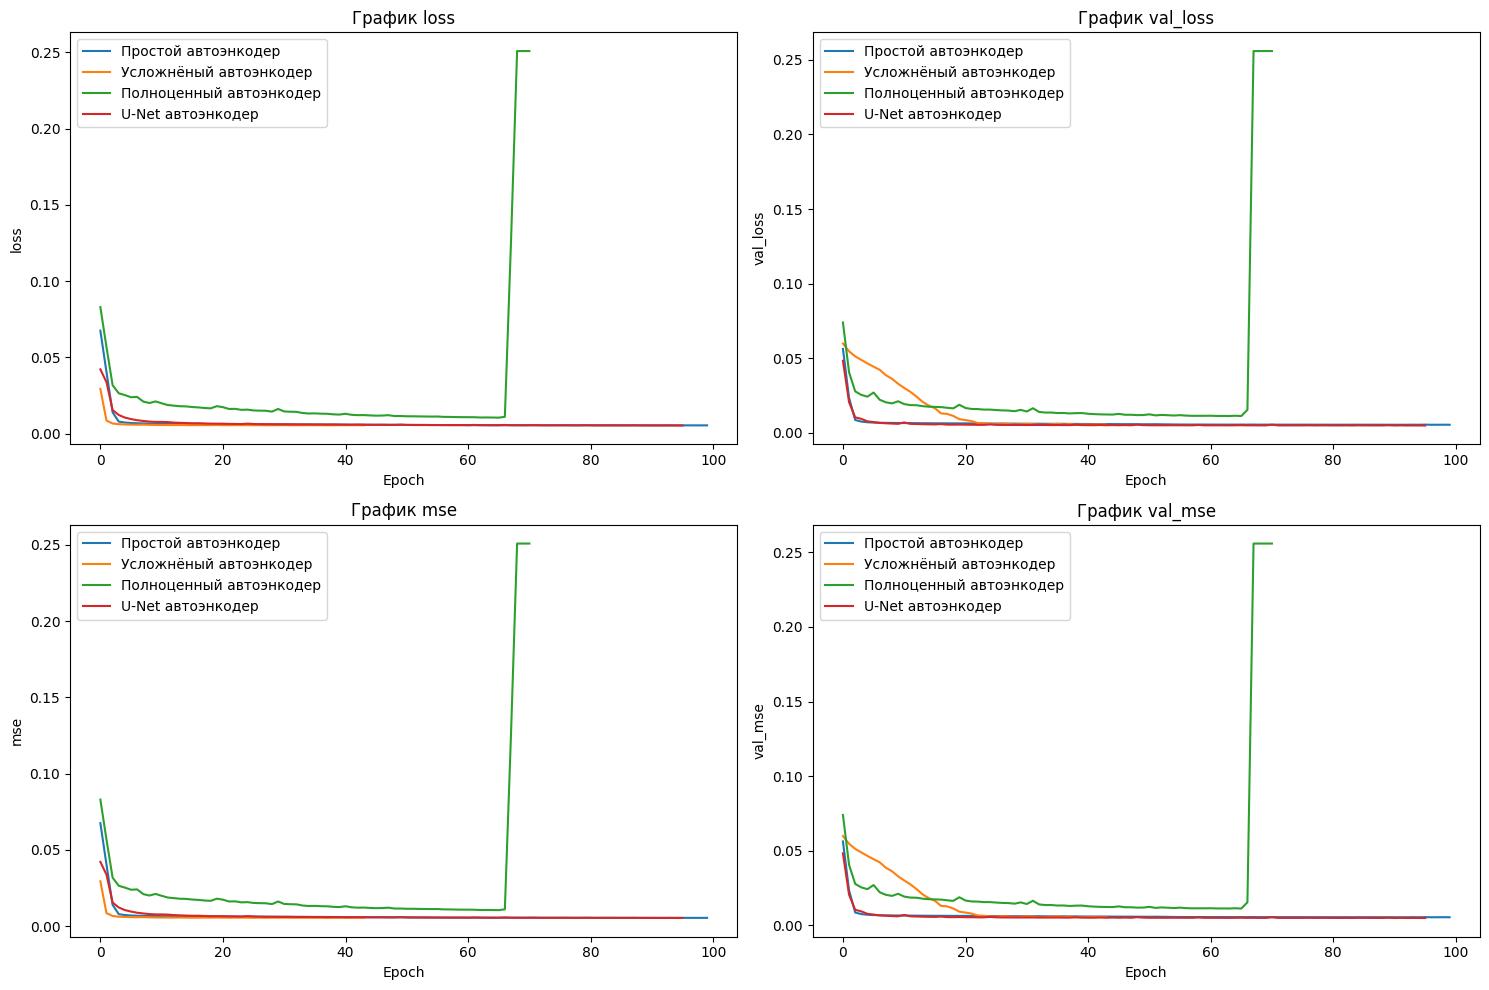

In [ ]:
#@title –ì—Ä–∞—Ñ–∏–∫–∏ –º–µ—Ç—Ä–∏–∫

 # –°–ø–∏—Å–æ–∫ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
metrics = ['loss', 'val_loss', 'mse', 'val_mse']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Å–µ—Ç–∫—É 2x2 –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è 4 –≥—Ä–∞—Ñ–∏–∫–æ–≤
    for name, history in results.items():
        plt.plot(history[metric], label=f'{name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f"–ì—Ä–∞—Ñ–∏–∫ {metric}")
    plt.legend()

plt.tight_layout()
plt.show()



### –û–¶–ï–ù–ö–ê –†–ï–ó–£–õ–¨–¢–ê–¢–û–í

25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step


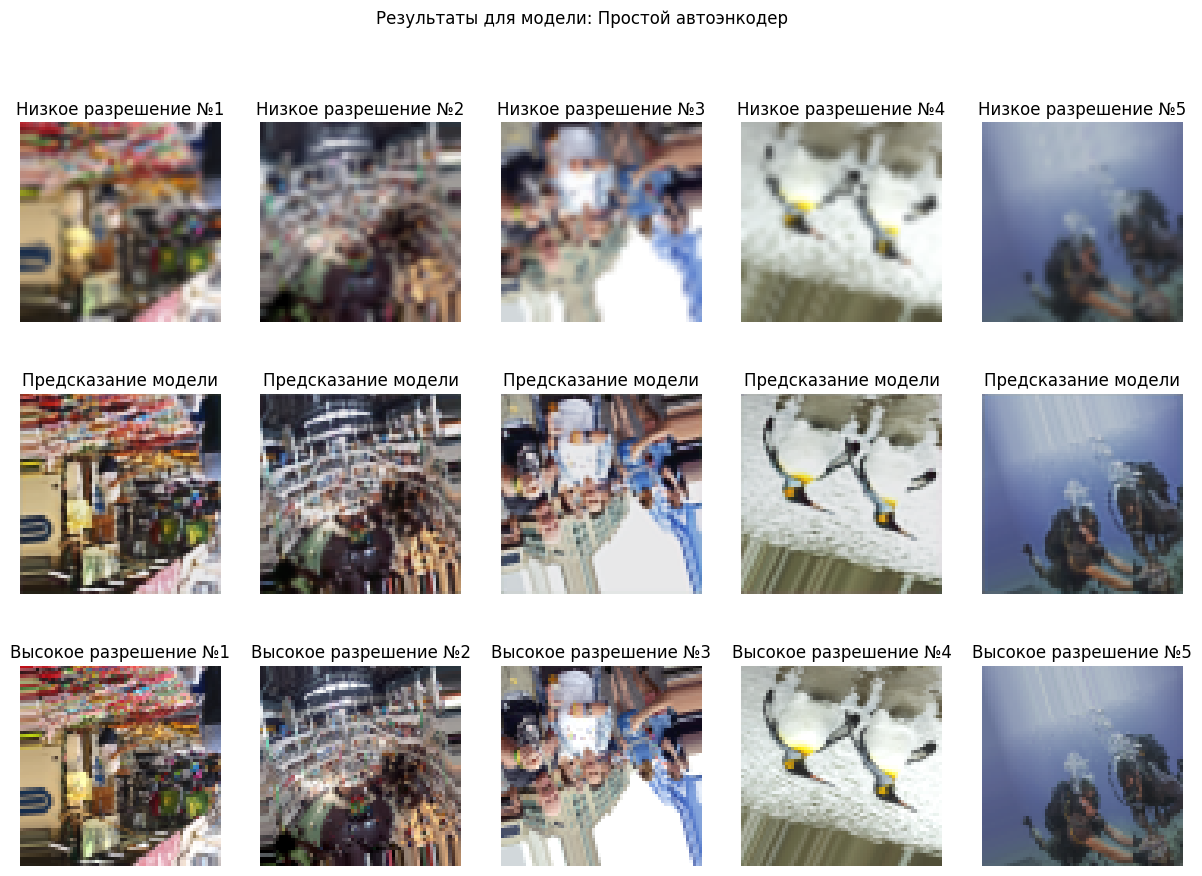

25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step


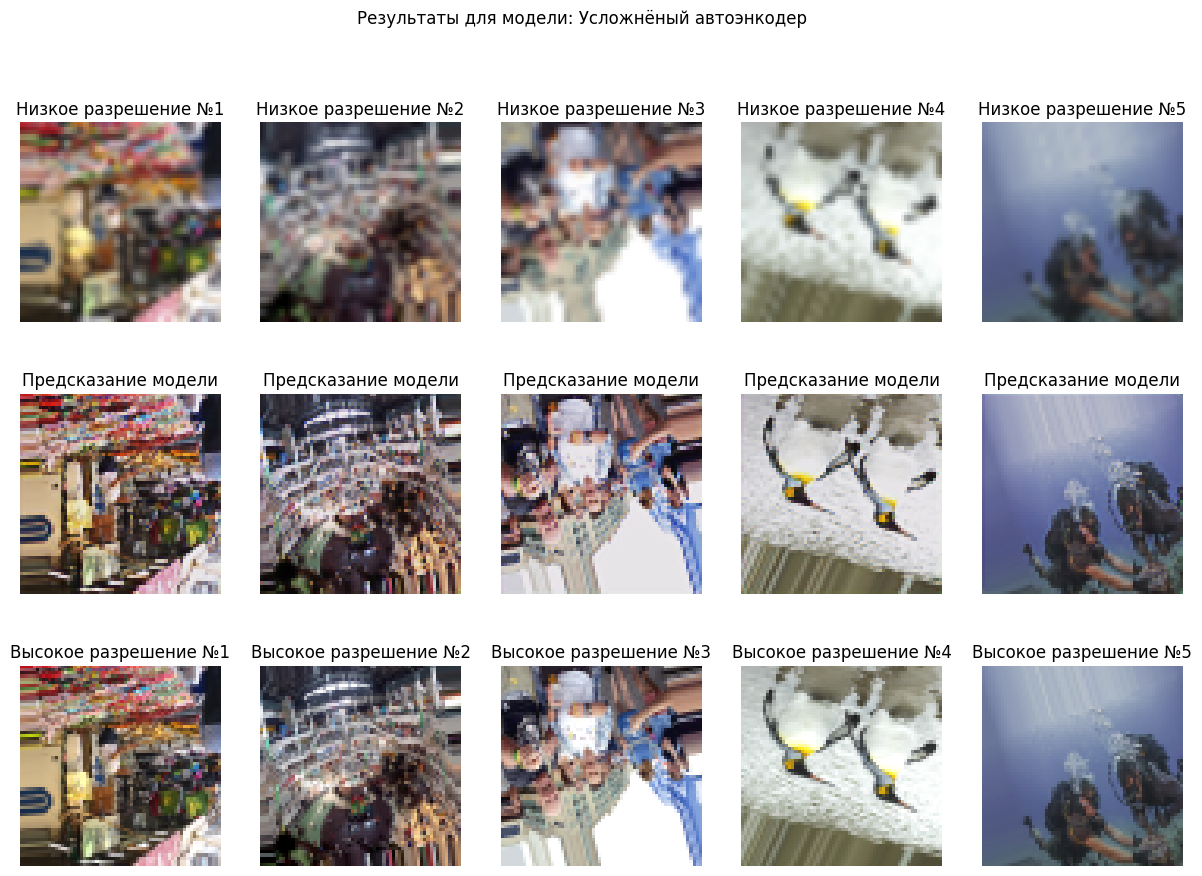

25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step


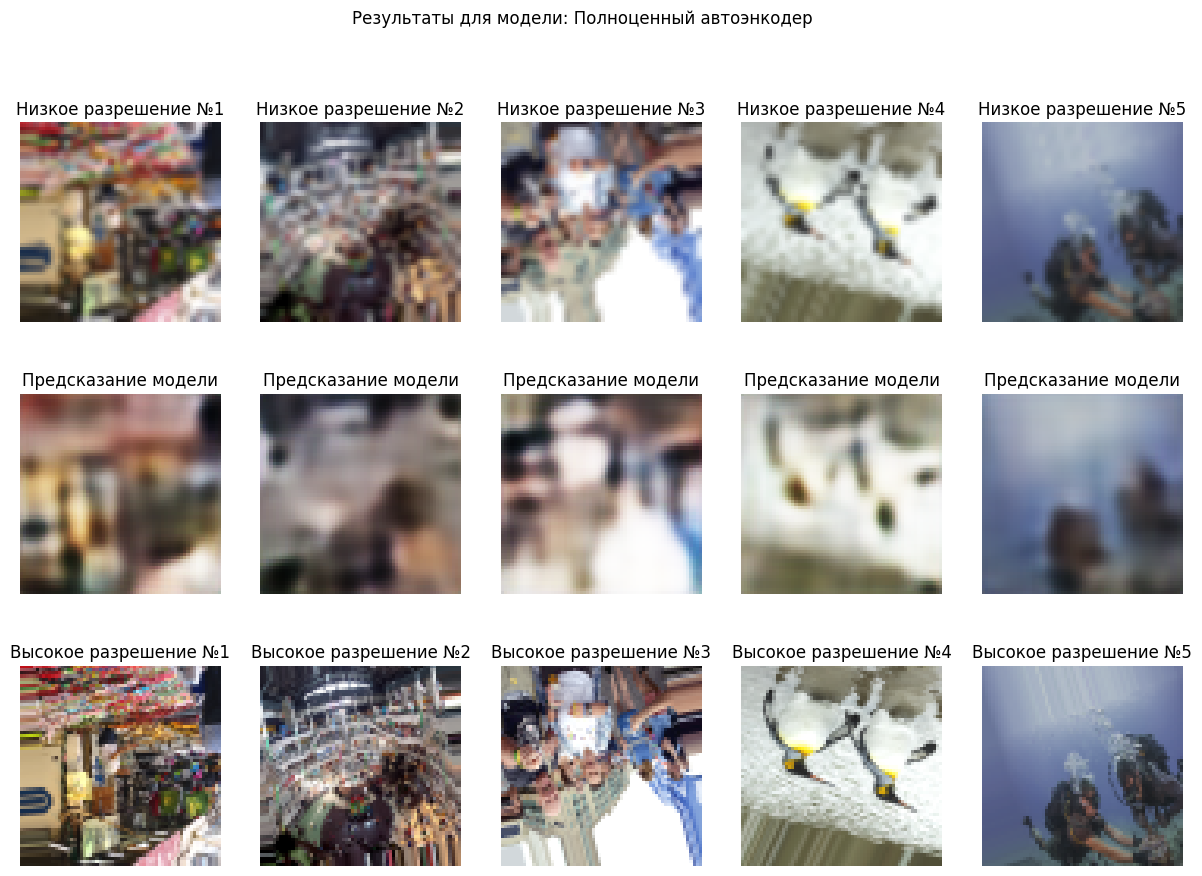

25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 30ms/step


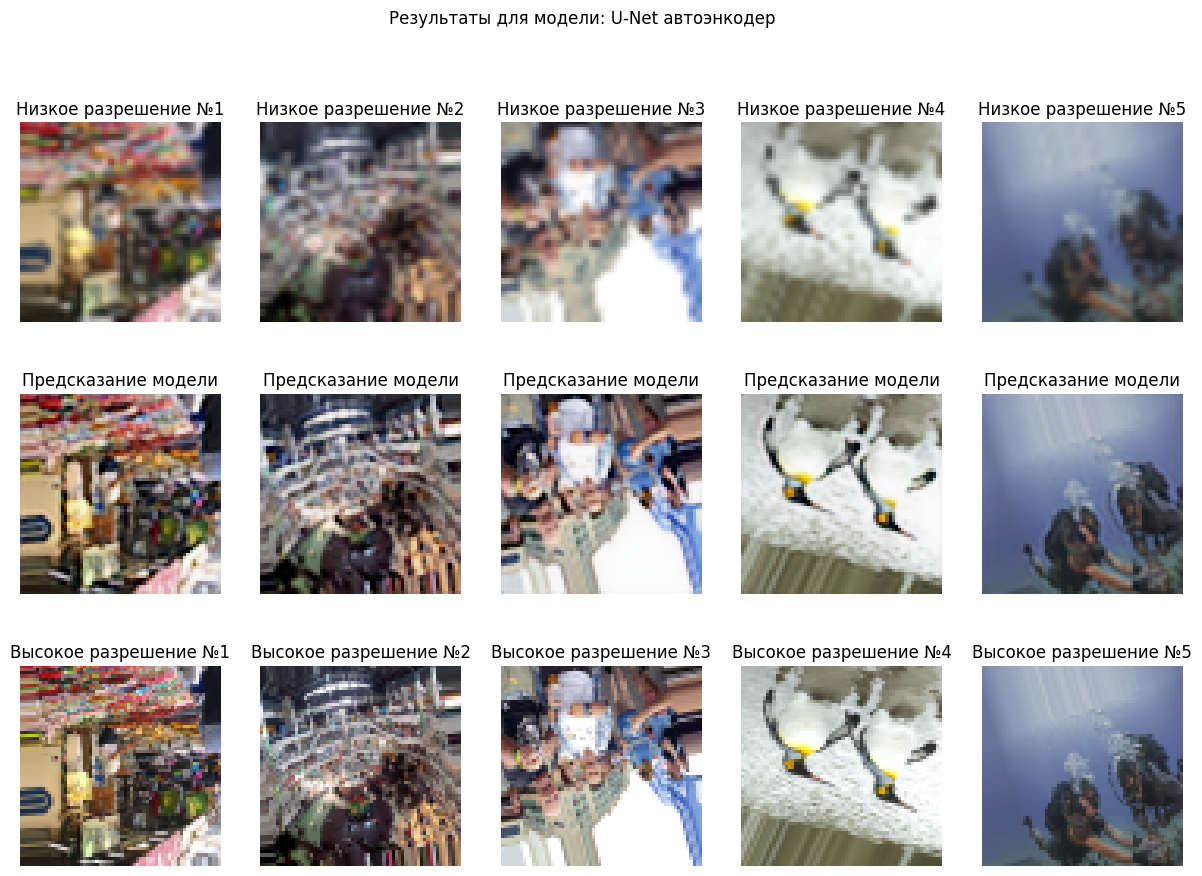

In [ ]:
#@title –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏

for name, model in models_to_test.items():

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    predictions = model.predict(test_hr)         # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –ø–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º test_hr
    predictions = np.clip(predictions, 0.0, 1.0) # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–∏–∫—Å–µ–ª–µ–π –æ—Ç 0 –¥–æ 1

    # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    n_images = min(5, len(predictions))
    fig, axes = plt.subplots(3, n_images, figsize=(15, 10))

    for i in range(n_images):
        axes[0, i].imshow(test_lr[i])
        axes[0, i].set_title(f'–ù–∏–∑–∫–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ ‚Ññ{i + 1}')
        axes[0, i].axis('off')

        axes[1, i].imshow(predictions[i])
        axes[1, i].set_title("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏")
        axes[1, i].axis('off')

        axes[2, i].imshow(test_hr[i])
        axes[2, i].set_title(f'–í—ã—Å–æ–∫–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ ‚Ññ{i + 1}')
        axes[2, i].axis('off')

    plt.suptitle(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏: {name}")  # –ó–∞–≥–æ–ª–æ–≤–æ–∫ –¥–ª—è –≤—Å–µ–π —Ñ–∏–≥—É—Ä—ã
    plt.show()

In [ ]:
#@title # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫

for name, model in models_to_test.items():
    print("")
    print(f"–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ {name}:")
    predictions = model.predict(test_hr) # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤—ã—Å–æ–∫–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤ —Ñ–æ—Ä–º–∞—Ç float64 –¥–ª—è skimage.metrics
    predictions = np.array(predictions, dtype=np.float64)

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ test_hr –≤ NumPy –º–∞—Å—Å–∏–≤ –¥–ª—è skimage.metrics
    test_hr_np = np.array(test_hr, dtype=np.float64)

    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤ –¥–ª—è –º–µ—Ç—Ä–∏–∫
    psnr_values = []
    ssim_values = []

    for i in range(len(predictions)):
        # –ü–æ–ª—É—á–∞–µ–º —Ä–∞–∑–º–µ—Ä—ã —Ç–µ–∫—É—â–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        hr_shape = test_hr[i].shape
        pred_shape = predictions[i].shape

        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —Ç–µ–∫—É—â–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        min_dim = min(hr_shape[0], hr_shape[1], pred_shape[0], pred_shape[1])

        # –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º win_size –±–µ–∑–æ–ø–∞—Å–Ω–æ, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –æ—à–∏–±–æ–∫
        win_size = min(min_dim, 7)  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ win_size
        if win_size % 2 == 0:
            win_size -= 1  # –î–µ–ª–∞–µ–º win_size –Ω–µ—á—ë—Ç–Ω—ã–º

        # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º PSNR –∏ SSIM –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        try:
            psnr_values.append(psnr(test_hr_np[i], predictions[i], data_range=1.0)) # –ò—Å–ø–æ–ª—å–∑—É–µ–º test_hr_np
            ssim_values.append(
                ssim(
                    test_hr_np[i], predictions[i], # –ò—Å–ø–æ–ª—å–∑—É–µ–º test_hr_np
                    channel_axis=-1,               # –£–∫–∞–∑—ã–≤–∞–µ–º –æ—Å—å –∫–∞–Ω–∞–ª–æ–≤
                    data_range=1.0,                # –î–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω –ø–∏–∫—Å–µ–ª–µ–π
                    win_size=win_size              # –†–∞–∑–º–µ—Ä —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ –æ–∫–Ω–∞
                )
            )
        # –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö –æ—à–∏–±–æ–∫
        except ValueError as e:
            print(f"  –û—à–∏–±–∫–∞ –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ –º–µ—Ç—Ä–∏–∫: {e}")
            continue

    # –í—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–∏—Ö –º–µ—Ç—Ä–∏–∫
    if psnr_values and ssim_values:  # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ —Å–ø–∏—Å–∫–∏ –Ω–µ –ø—É—Å—Ç—ã–µ
        print(f"–°—Ä–µ–¥–Ω–∏–π PSNR: {np.mean(psnr_values):.4f}")
        print(f"–°—Ä–µ–¥–Ω–∏–π SSIM: {np.mean(ssim_values):.4f}")
    else:
        print("–ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫.")


–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –ü—Ä–æ—Å—Ç–æ–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
–°—Ä–µ–¥–Ω–∏–π PSNR: 30.0854
–°—Ä–µ–¥–Ω–∏–π SSIM: 0.9556

–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –£—Å–ª–æ–∂–Ω—ë–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step
–°—Ä–µ–¥–Ω–∏–π PSNR: 29.2855
–°—Ä–µ–¥–Ω–∏–π SSIM: 0.9531

–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step
–°—Ä–µ–¥–Ω–∏–π PSNR: 20.0900
–°—Ä–µ–¥–Ω–∏–π SSIM: 0.5151

–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 33ms/step
–°—Ä–µ–¥–Ω–∏–π PSNR: 28.1222
–°—Ä–µ–¥–Ω–∏–π SSIM: 0.9358


### –í–´–í–û–î–´

* **–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:**

 * –í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ –±—ã–ª–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω—ã —á–µ—Ç—ã—Ä–µ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–æ–≤ –¥–ª—è –∑–∞–¥–∞—á–∏ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏–ª–æ—Å—å –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ DIV2K —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –º–µ—Ç—Ä–∏–∫ PSNR –∏ SSIM –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞.

 * –ü—Ä–æ—Å—Ç–æ–π –∏ –£—Å–ª–æ–∂–Ω–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä—ã –ø–æ–∫–∞–∑–∞–ª–∏ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º PSNR (30.09 –∏ 29.29 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ) –∏ SSIM (0.96 –∏ 0.95 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ).
 –≠—Ç–∏ –º–æ–¥–µ–ª–∏ –±—ã—Å—Ç—Ä–æ –æ–±—É—á–∞—é—Ç—Å—è –∏ –∏–º–µ—é—Ç –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Ö –ø–æ–¥—Ö–æ–¥—è—â–∏–º–∏ –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–π —Å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–º–∏ —Ä–µ—Å—É—Ä—Å–∞–º–∏. –£—Å–ª–æ–∂–Ω–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä, –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–ª–æ—é –ø–∞–∫–µ—Ç–Ω–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏, –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ.

 * –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –ø–æ–∫–∞–∑–∞–ª —Ö—É–¥—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—Ä–æ—Å—Ç—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ (PSNR 20.09, SSIM 0.52). –ë–æ–ª–µ–µ –≥–ª—É–±–æ–∫–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –Ω–µ –ø—Ä–∏–≤–µ–ª–∞ –∫ –ø–æ–≤—ã—à–µ–Ω–∏—é –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏, –≤–æ–∑–º–æ–∂–Ω–æ, –∏–∑-–∑–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ –Ω–µ–±–æ–ª—å—à–æ–º –æ–±—ä–µ–º–µ –¥–∞–Ω–Ω—ã—Ö. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ —ç—Ç–∞ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –¥–æ–ª—å—à–µ, —á–µ–º –ø—Ä–æ—Å—Ç—ã–µ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä—ã.

 * U-Net –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª —Å—Ä–∞–≤–Ω–∏–º—ã–µ —Å –ø—Ä–æ—Å—Ç—ã–º–∏ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ PSNR (28.12) –∏ SSIM (0.94). U-Net –æ–±–ª–∞–¥–∞–µ—Ç –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –¥–æ–ª—å—à–µ. Skip-connections –≤ U-Net, —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏, –¥–æ–ª–∂–Ω—ã –ø–æ–º–æ–≥–∞—Ç—å —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –¥–µ—Ç–∞–ª–∏ –ø—Ä–∏ –ø–æ–≤—ã—à–µ–Ω–∏–∏ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è, –Ω–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —ç—Ç–æ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –Ω–µ –ø—Ä–æ—è–≤–∏–ª–æ—Å—å –≤ –ø–æ–ª–Ω–æ–π –º–µ—Ä–µ, –≤–µ—Ä–æ—è—Ç–Ω–æ –∏–∑-–∑–∞ –º–∞–ª–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è.

* **–ü—Ä–æ–±–ª–µ–º—ã –∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è:**

 * –ü–æ–ª–Ω–æ—Ü–µ–Ω–Ω—ã–π –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä:

  –û–±—É—á–µ–Ω–∏–µ —Å—Ç–∞–ª–æ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–º –ø–æ—Å–ª–µ 60-–π —ç–ø–æ—Ö–∏, —á—Ç–æ –º–æ–≥–ª–æ –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω–æ —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π –∏–ª–∏ –≤—ã—Å–æ–∫–æ–π —Å–∫–æ—Ä–æ—Å—Ç—å—é –æ–±—É—á–µ–Ω–∏—è.

 * –û–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–π –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö:

  –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ DIV2K –º–æ–∂–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π –∏ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –∏–∑-–∑–∞ –Ω–µ—Ö–≤–∞—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

 * –í—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ—Å—É—Ä—Å—ã:

  –û–±—É—á–µ–Ω–∏–µ U-Net –∑–∞–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –Ω–∞ CPU. –ü–æ—ç—Ç–æ–º—É —Ç—Ä–µ–±—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ GPU, —á—Ç–æ —Å—Ç–∞–≤–∏—Ç –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —Ä–µ—Å—É—Ä—Å–Ω—ã–µ —Ä–∞–º–∫–∏.

 * –í—ã–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–≥—É—Ç –±—ã—Ç—å —É–ª—É—á—à–µ–Ω—ã –ø—É—Ç–µ–º –±–æ–ª–µ–µ —Ç—â–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å—Ç—Ä–æ–≤, —Ä–∞–∑–º–µ—Ä —è–¥—Ä–∞, —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.

 * –ú–µ—Ç—Ä–∏–∫–∏ PSNR –∏ SSIM: –≠—Ç–∏ –º–µ—Ç—Ä–∏–∫–∏ –Ω–µ –≤—Å–µ–≥–¥–∞ —Ç–æ—á–Ω–æ –æ—Ç—Ä–∞–∂–∞—é—Ç —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–æ–µ –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —á–µ–ª–æ–≤–µ–∫–æ–º.

* **–í–æ–∑–º–æ–∂–Ω—ã–µ —É–ª—É—á—à–µ–Ω–∏—è:**

 * –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥–æ–π –±–æ–ª–µ–µ –æ–±—à–∏—Ä–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –º–æ–¥–µ–ª—è–º –æ–±—É—á–∏—Ç—å—Å—è –±–æ–ª–µ–µ –æ–±—â–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∏ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–≤—ã—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è.

 * –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–µ–π: –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä, –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–µ–≤, —Ñ–∏–ª—å—Ç—Ä–æ–≤ –∏ —Ç.–¥.

 * –ü–æ–¥–æ–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –≠—Ç–æ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π.

 * –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã–µ –º–µ—Ç–æ–¥—ã –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö. –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å —É–º–µ–Ω—å—à–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –∏ —É–ª—É—á—à–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π.

 * –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –Ω–∞–ø—Ä–∏–º–µ—Ä LPIPS –∏–ª–∏ FID.

 * –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –¥—Ä—É–≥–∏—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞—Ö –∏–ª–∏ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è—Ö –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ –≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—ã–µ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä—ã –∏–ª–∏ GAN-–æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã.

–í —Ü–µ–ª–æ–º, –ø—Ä–æ–µ–∫—Ç –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–æ–≤ –º–æ–≥—É—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á–∏ —É–ª—É—á—à–µ–Ω–∏—è —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –æ–¥–Ω–∞–∫–æ —Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–∞–ª—å–Ω–µ–π—à–∞—è —Ä–∞–±–æ—Ç–∞ –Ω–∞–¥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –º–æ–¥–µ–ª–µ–π –∏ –∏—Ö –æ–±—É—á–µ–Ω–∏–µ–º.